<img src="fireblaze.jpg" width=250 height=200 />

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.shape

(891, 15)

In [7]:
df['age'].fillna(df['age'].median(), inplace=True)

In [8]:
df.drop('deck', axis=1, inplace=True)

In [9]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

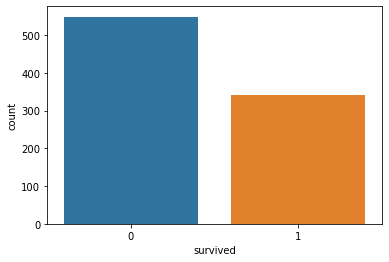

In [10]:
sns.countplot(df['survived'])
plt.show()

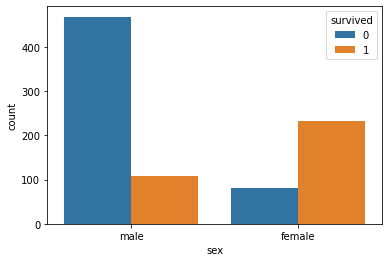

In [11]:
sns.countplot(x='sex', hue='survived', data=df)
plt.show()

In [12]:
gender = pd.get_dummies(df['sex'], drop_first=True)
df['Gender'] = gender

df.drop('sex', inplace=True, axis=1)

In [13]:
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,Gender
0,0,3,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,1,1,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0
4,0,3,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1


In [14]:
embarked = pd.get_dummies(df['embarked'], drop_first=True)

df = pd.concat([df, embarked], axis=1)

df.drop('embarked', inplace=True, axis=1)

In [15]:
df.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,Gender,Q,S
0,0,3,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1,0,1
1,1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,0,0,0
2,1,3,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0,0,1
3,1,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,0,0,1
4,0,3,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,1,0,1


In [16]:
df.shape

(891, 15)

In [17]:
X = df[['age', 'Gender','fare','S','Q', 'pclass']]

y = df['survived']

In [18]:
X.shape

(891, 6)

In [19]:
y.shape

(891,)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [22]:
#building logistic regression model

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
classifier = LogisticRegression()

In [25]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [26]:
#evaluate the model 

In [27]:
ypred = classifier.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
cm = confusion_matrix(y_test, ypred)

In [30]:
cm

array([[138,  30],
       [ 27,  73]])

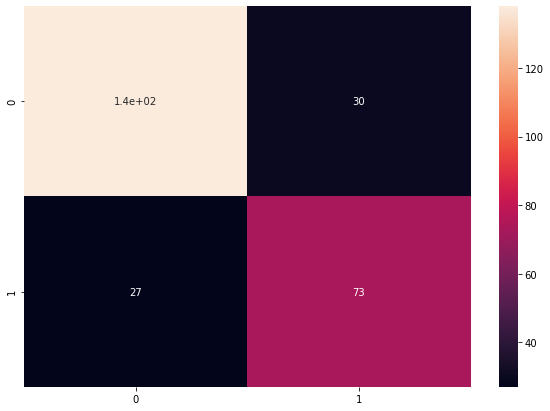

In [31]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.show()

In [32]:
cm

array([[138,  30],
       [ 27,  73]])

In [33]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       168
           1       0.71      0.73      0.72       100

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.77       268
weighted avg       0.79      0.79      0.79       268



### AUC - ROC

In [34]:
from sklearn.metrics import roc_auc_score

In [35]:
from sklearn.metrics import roc_curve

In [36]:
score = roc_auc_score(y_test, ypred)

In [37]:
score

0.7757142857142857

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, ypred)

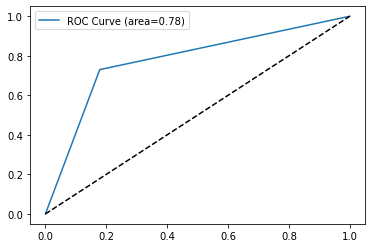

In [39]:
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()